# Fun with normal data in Python

* How to glean information about the distribution of data by computing basic descriptive statistics.
* Visual analysis of normality. 
* Formal normality tests. 
* How to normalise measurements and compute z scores. 
* Calculate proportion of observations less / greater than a value. 
* Calculate proportion of observations between two values. 

The main dataset I am using consists of 25,000 synthetic records of human heights and weights: [data set](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights).

My code and descriptions may contain errors.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

## Load data and cleanup

In [2]:
# parse the table from an HTML file and clean up the dataframe a bit
heights_table = pd.read_html('../data/SOCR_Data_Dinov_020108_HeightsWeights.html')
# get our dataframe from index 0
heights_df = heights_table[0]

In [3]:
# set some meaningful column names
heights_df.columns = ['Index', "Height (inches)", "Weight (pounds)"]
# set the index
heights_df = heights_df.set_index("Index")
# get rid of the first row of textual values
heights_df = heights_df.iloc[1:]
# convert the two columns from strings to float64
heights_df[['Height (inches)', 'Weight (pounds)']] = heights_df[['Height (inches)', 'Weight (pounds)']].apply(pd.to_numeric)
heights_df.sample(10)

,Height (inches),Weight (pounds)
Index,,
4394,68.10745,132.0081
20692,68.41290,130.3184
8359,67.71834,124.1642
11706,69.90933,145.0568
16378,68.90454,145.1237
7012,67.80572,138.3332
2056,65.57359,107.7067
948,69.21225,130.8805
17736,69.18731,133.4524


In [4]:
# double-check to make sure we did not lose any data
heights_df.shape

(25000, 2)

In [5]:
# and that it is of the desired data type
heights_df.dtypes

Height (inches)    float64
Weight (pounds)    float64
dtype: object

## Inspect distribution

In [6]:
col_name_height = 'Height (inches)'
col_name_weight = 'Weight (pounds)'

In [7]:
# summary of data
heights_df.describe()

,Height (inches),Weight (pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


There seems to be less variance in the height measurements than in the weight measurements. I guess this could be due to the fact that human beings vary less in height than in weight. That is, there is more or less a 'normal' range of heights, but someone's weight can fluctuate more significantly.

The `mean` and `median` for both variables are quite close to each other, which indicates a symmetric data distribution. In addition, the density plots for both variables look normal.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e9b3d30>,
      dtype=object)

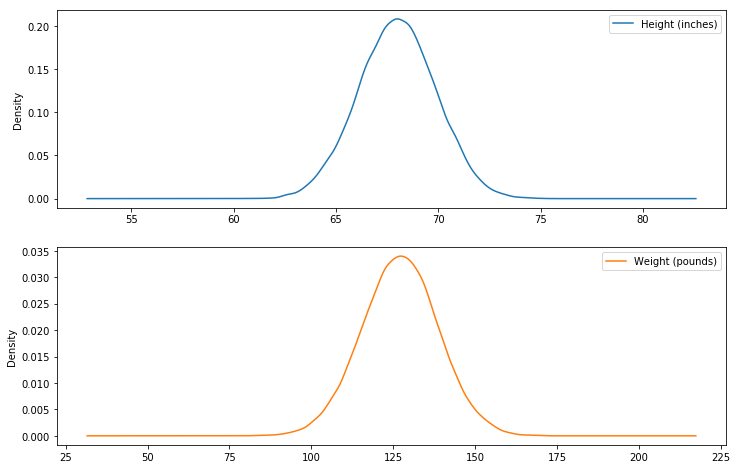

In [8]:
heights_df.plot.density(subplots=True, figsize=(12, 8), sharex=False)

Height (inches)       AxesSubplot(0.125,0.125;0.352273x0.755)
Weight (pounds)    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

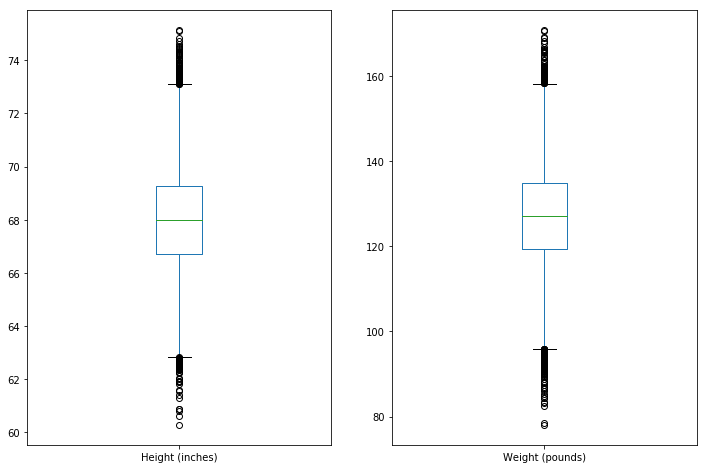

In [9]:
heights_df.plot.box(subplots=True, figsize=(12, 8))

The box plots make it appear as though there were quite a few outliers in both variables. How many outliers are there? 

We can standardise the measurements by calculating their z-scores and then test for outliers by checking which measurements are three or more standard deviations away from the mean. Such measurements can be considered fairly 'unlikely' or extreme given given the overall distribution of all measurements.

z-scores are calculated as follows: $z = \frac{x - \mu}{\sigma}$.

Making use of the 68-95-99.7 or Three Sigma rule is possible for normally distributed data, in which the standard deviation indicates the average distance of observed values from the mean. For non-normal distributions, you can make use of [Chebyshev's Inequality](https://en.wikipedia.org/wiki/Chebyshev's_inequality).

In [10]:
z_scores_heights = np.abs(stats.zscore(heights_df[col_name_height]))

# outliers_height_idx contains the indices at which z_scores_heights contains elements that satisfy the condition. 
# In this case, the array is one-dimensional (i.e. multiple rows with a single column).
outliers_height_idx = np.where(z_scores_heights > 3)[0]
proportion_outliers_height = len(outliers_height_idx) / len(heights_df) * 100

z_scores_weights = np.abs(stats.zscore(heights_df[col_name_weight]))

# outliers_weight_idx contains the indices of z_scores_weights whose elements have a z-score greater than 3
outliers_weight_idx = np.where(z_scores_weights > 3)[0]
proportion_outliers_weight = len(outliers_weight_idx) / len(heights_df) * 100

# using the indices matching the condition specified in the np.where condition in order to retrieve the corresponding 
# z-scores
outliers_height = z_scores_heights[outliers_height_idx]
outliers_weight = z_scores_weights[outliers_weight_idx]

print(f"Number of outliers in {col_name_height} is {len(outliers_height_idx)}\n"\
      f"proportion of outliers: {proportion_outliers_height:.3f}%,\n"\
      f"mean: {np.mean(outliers_height)},\n"\
      f"median: {np.median(outliers_height)},\n"\
      f"(min, max): ({np.min(outliers_height)}, {np.max(outliers_height)})\n"\
      f"percentiles (90, 95, 99): ({np.percentile(outliers_height, [90, 95, 99])})")
print("\n")
print(f"Number of outliers in {col_name_weight} is {len(outliers_weight_idx)}\n"\
      f"proportion of outliers: {proportion_outliers_weight:.3f}%,\n"\
      f"mean: {np.mean(outliers_weight)},\n"\
      f"median: {np.median(outliers_weight)},\n"\
      f"(min, max): ({np.min(outliers_weight)}, {np.max(outliers_weight)})\n"\
      f"percentiles (90, 95, 99): ({np.percentile(outliers_weight, [90, 95, 99])})")

Number of outliers in Height (inches) is 51
proportion of outliers: 0.204%,
mean: 3.3217446896327747,
median: 3.261271323083352,
(min, max): (3.0122059780250807, 4.056893316219705)
percentiles (90, 95, 99): ([3.74589346 3.77216362 3.96899817])


Number of outliers in Weight (pounds) is 69
proportion of outliers: 0.276%,
mean: 3.3135150921856384,
median: 3.2232193409056125,
(min, max): (3.0002646340848855, 4.20770718684688)
percentiles (90, 95, 99): ([3.68305539 3.76773749 4.17545335])


There are some extreme (i.e. more than three standard deviations away from the mean) values, but their propotion in the overall dataset is low. These outliers may either be due to a natural degree of variance or due to an error in measurement or recording the observations. Difficult to tell.

Let's try to examine if the outliers in height and weight are related to each other. That is, if an individual has an outlier for one value (e.g., height), does the same individual also have an outlier for the other value (e.g., weight)?

In [11]:
heights_df['Z-Scores-Height'] = z_scores_heights
heights_df['Z-Scores-Weight'] = z_scores_weights

In [12]:
heights_df[(heights_df['Z-Scores-Height'] > 3.0) & (heights_df['Z-Scores-Weight'] > 3.0)]

,Height (inches),Weight (pounds),Z-Scores-Height,Z-Scores-Weight
Index,,,,
2652,60.61265,88.04646,3.881103,3.347405
10241,61.93152,85.29040,3.187560,3.583760
10331,74.36328,164.66430,3.349826,3.223219
14107,61.90725,78.56785,3.200322,4.160275
17080,74.29570,170.54790,3.314289,3.727788
22946,61.92639,78.01476,3.190257,4.207707


In only six individuals out of 25,000 (or six individuals out of a few dozen outliers) does an unusual height coincide with an unusual weight.

Continuing to examine the question of normality, we can use a Normal-Quantile or Quantile-Quantile plot. This kind of plot allows us to test visually how well the actual measurements fit a theoretical distribution. In this case, the Q-Q plots confirm that the data appear to be normally distributed.

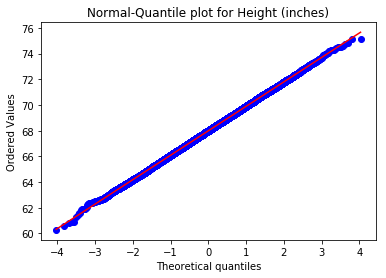

In [13]:
stats.probplot(heights_df[col_name_height], dist='norm', plot=plt)
plt.title(f"Normal-Quantile plot for {col_name_height}")
plt.show()

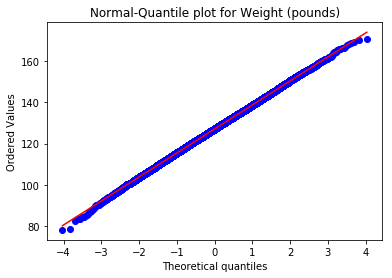

In [14]:
stats.probplot(heights_df[col_name_weight], dist='norm', plot=plt)
plt.title(f"Normal-Quantile plot for {col_name_weight}")
plt.show()

Another way of going about a quantile-quantile plot [Normal Q-Q plot](http://scientificpythonsnippets.com/index.php/distributions/6-q-q-plot-in-python-to-test-if-data-is-normally-distributed).

We can also use a more formal test of normality. For instance, the Shapiro-Wilk test examines the null hypothesis that states that the data was drawn from a normal distribution. If it returns $\text{p-value} \lt 0.05$, then we reject the null hypothesis in favour of the alternative hypothesis that the data is not normally distributed. Otherwise, we fail to reject the null hypothesis and assume that the data is normally distributed.

In [15]:
# Shapiro-Wilk test on heights
W, p = stats.shapiro(heights_df[col_name_height])
print(f"p: {p}")
if p < 0.05:
    print(f"The {col_name_height} data is not normally distributed with a p-value of {p}.")
elif p >= 0.05:
    print(f"The {col_name_height} data appears to be normally distributed with a p-value of {p}.")
elif math.isnan(p):
    print("Something went wrong.")

p: 0.7015516757965088
The Height (inches) data appears to be normally distributed with a p-value of 0.7015516757965088.


/anaconda3/envs/py362scipy/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [16]:
# Shapiro-Wilk test on weights
W, p = stats.shapiro(heights_df[col_name_weight])
print(f"p: {p}")
if p < 0.05:
    print(f"The {col_name_weight} data is not normally distributed with a p-value of {p}.")
elif p >= 0.05:
    print(f"The {col_name_weight} data appears to be normally distributed with a p-value of {p}.")
elif math.isnan(p):
    print("Something went wrong.")

p: 0.40950363874435425
The Weight (pounds) data appears to be normally distributed with a p-value of 0.40950363874435425.


/anaconda3/envs/py362scipy/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**However**, the Shapiro-Wilk test is not accurate for large datasets with $n \gt 5,000$. In fact, for large datasets, formal normality tests tend to be quite sensitive to any deviation from normality, so that even a small deviation may result in classifiying the variable to be from a non-normal distribution. 

I guess, for 'large' datasets, you could assume that the Central Limit Theorem (CLT) is in effect and therefore rely at most on visual inspection (e.g., via Q-Q plots) to confirm that this is the case. While this manual approach may work well for small numbers of univariate metrics, it is probably less fitting for handling large numbers of such variables.

Another question is how to determine what 'large enough' is for a given dataset or how its distribution affects this decision. The CLT states that:

> Given an infinite set of random and independent samples of N observations each, the distribution of sample means approaches normality as the size of N increases, regardless of the sampling distribution or of the population distribution. 

So, if you take infinitely many independent samples and calculate the mean of each, then the distribution of those means would be normally distributed. And this is true, even if the sample distributions itself are not at all normal (e.g., exponential). 

How large $N$ needs to be depends on the distribution/shape of the population. A rule of thumb that has been discovered experimentally (by running Monte Carlo simulations) states that $N \ge 30$ is sufficient for the CLT to be in effect and thus for the assumption of Normality to hold for even the most non-normal data. Such values of $N$ should be fairly common in the era of handling Big Data.

An interesting discussion on the topic of normality testing can be found here: [Is normality testing 'essentially useless'?](https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless?newreg=1e4942f66879426da620a8366f24c282).

There is a great explanation of what constitutes a 'large enough' dataset for the Central Limit Theorem to take effect here: [The Assumption(s) of Normality](http://www2.psychology.uiowa.edu/faculty/mordkoff/GradStats/part%201/I.07%20normal.pdf). 

On another note, above, we have tested the distribution of each sample. When you want to apply a parametric significance test to compare two samples for a statistically significant difference (e.g., Student's t-test), then:
* when dealing with two independent samples, test that both samples $x$ and $y$ are normally distributed
* when dealing with two paired samples, test that the difference between both samples $x - y$ is normally distributed.

This is in addition to testing any of the other assumptions made by the test you want to apply.

More information on this topic: [T-test analysis](http://www.sthda.com/english/wiki/t-test-analysis-is-it-always-correct-to-compare-means).

## Calculate proportions

Next, I want to answer several questions given the density function of the measurements.
1. What proportion of measurements are at or below a given value?
2. What proportion of measurements are above a given value?
3. What proportion of measurements are between two values?

First, we will get the values corresponding to the 25th 50th, 75th, 90th, 95th and 99th percentile and then we calculate the proportion of measurements that fall at or below these values (as a way to double-check our results :-).

In [17]:
# calculate cummulative proportions for height values that correspond to the percentiles
mean_height = np.mean(heights_df[col_name_height]) 
std_height = np.std(heights_df[col_name_height])
percentiles = [25, 50, 75, 90, 95, 99]
percentiles_height = np.percentile(heights_df[col_name_height], percentiles)
proportions_height = []

for idx, percentile in enumerate(percentiles):
    # this is where we compute the proportion of values at or below the value at the given percentile
    proportions_height.append(stats.norm.cdf(percentiles_height[idx], mean_height, std_height))

d = {}
d['percentile'] = pd.Series(percentiles)
d['value at percentile'] = pd.Series(percentiles_height) 
d['proportion under value'] = pd.Series(proportions_height)
height_proportions_df = pd.DataFrame(d)
height_proportions_df

,percentile,value at percentile,proportion under value
0,25,66.704397,0.248985
1,50,67.995700,0.500543
2,75,69.272958,0.749533
3,90,70.445094,0.901371
4,95,71.110197,0.949409
5,99,72.372215,0.989355


How would we use this in practice? If we wanted to know, what proportion of people have a height of $70$ inches or less, we could calculate the proportion of values to the left of $70$ and find that the probability, given our sample, of someone being $70$ inches or less in height is approximately $85\%$.

In [18]:
prop_height_70 = stats.norm.cdf(70.0, mean_height, std_height)
print(f"Proportion of heights up to 70 inches is: {prop_height_70 * 100:.2f}%")

Proportion of heights up to 70 inches is: 85.44%


In [19]:
# calculate cummulative proportions for weight values that correspond to the percentiles
mean_weight = np.mean(heights_df[col_name_weight]) 
std_weight = np.std(heights_df[col_name_weight])
percentiles_weight = np.percentile(heights_df[col_name_weight], percentiles)
proportions_weight = []

for idx, percentile in enumerate(percentiles):
    # this is where we compute the proportion of values at or below the value at the given percentile
    proportions_weight.append(stats.norm.cdf(percentiles_weight[idx], mean_weight, std_weight))

d = {}
d['percentile'] = pd.Series(percentiles)
d['value at percentile'] = pd.Series(percentiles_weight) 
d['proportion under value'] = pd.Series(proportions_weight)
weight_proportions_df = pd.DataFrame(d)
weight_proportions_df

,percentile,value at percentile,proportion under value
0,25,119.308675,0.252576
1,50,127.157750,0.502680
2,75,134.892850,0.748593
3,90,141.912090,0.898318
4,95,146.193805,0.949416
5,99,154.316722,0.990250


The proportions at or below a certain value that we have just computed are the area under the curve and to the left of a given value. Given that the area under the density curve sums to $1$, we can obtain the proportion of values at or above a given value by subtracting the proportion to the left from 1.

In [20]:
proportion_height_greater_75th = 1 - stats.norm.cdf(69.272958, mean_height, std_height)
print(f"Proportion of heights greater than 69.27 inches is: {proportion_height_greater_75th * 100:.2f}%")

Proportion of heights greater than 69.27 inches is: 25.05%


Let's illustrate this with the help of density plots. The first figure colours the area under the density curve of values to the left of the $75^{th}$ percentile (the measurements with a value at or below $69.272958$) in dark red. 

/anaconda3/envs/py362scipy/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


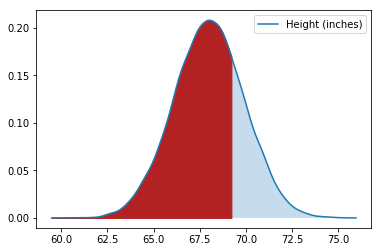

In [21]:
points = sns.kdeplot(heights_df[col_name_height], shade=True).get_lines()[0].get_data()
x = points[0]
y = points[1]
plt.fill_between(x, y, where = x <= 69.272958, color='#B22222')

The next figure highlights the area under the density curve that represents the proportion of measurements whose values are at or above (to the right) of the value at the $75^{th}$ percentile.

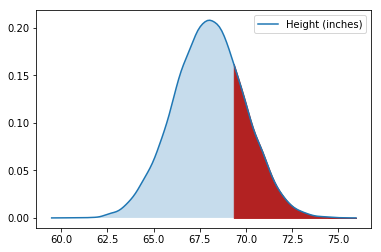

In [22]:
points = sns.kdeplot(heights_df[col_name_height], shade=True).get_lines()[0].get_data()
x = points[0]
y = points[1]
plt.fill_between(x, y, where = x >= 69.272958, color='#B22222')

Finally, two compute the proportion of measurements whose value falls between two values, we subtract the area under the curve of the smaller of the two values from the area of the larger value. This represents the remaining area as illustrated below. What is the proportion of measurements whose values lie between the $75^{th}$ and the $90^{th}$ percentile?

Proportion of heights up to 69.2729575 inches is: 74.95%
Proportion of heights up to 70.445094 inches is: 90.14%
Proportion of heights between 69.2729575 and 70.445094 is: 15.18%.


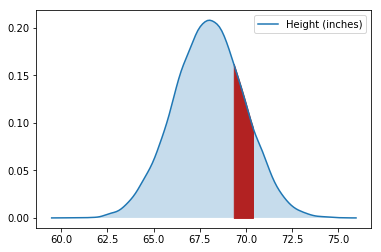

In [23]:
height_75th = np.percentile(heights_df[col_name_height], [75])
proportion_heights_75th = stats.norm.cdf(height_75th[0], mean_height, std_height)
print(f"Proportion of heights up to {height_75th[0]} inches is: {proportion_heights_75th * 100:.2f}%")

height_90th = np.percentile(heights_df[col_name_height], [90])
proportion_heights_90th = stats.norm.cdf(height_90th[0], mean_height, std_height)
print(f"Proportion of heights up to {height_90th[0]} inches is: {proportion_heights_90th * 100:.2f}%")

print(f"Proportion of heights between {height_75th[0]} and {height_90th[0]} is: {(proportion_heights_90th - proportion_heights_75th) * 100:.2f}%.")

points = sns.kdeplot(heights_df[col_name_height], shade=True).get_lines()[0].get_data()
x = points[0]
y = points[1]
plt.fill_between(x, y, where = (x >= height_75th[0]) & (x <= height_90th[0]), color='#B22222')

I am always pleasantly suprised by how easy it is to get things done using Pandas and friends.

## A few other common distributions

Mainly from [Probability Distributions in Python](https://www.datacamp.com/community/tutorials/probability-distributions-python).

### Uniform distribution

A distribution over several equally likely outcomes. For example, the values of 1 to 6 when rolling a fair die with these values.

Defined by two parameters that specify the start and end values to use for this uniform distribution (i.e. `loc` and `scale`). The distribution is constant between `loc` and `loc + scale`.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

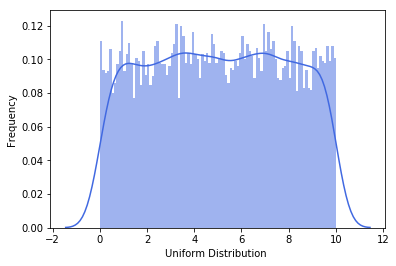

In [24]:
n = 10000
start = 0
end = 10
data_uniform = stats.uniform.rvs(size=n, loc=start, scale=end)
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='royalblue',
                  hist_kws={"linewidth": 10,'alpha': 0.50})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

### Gamma distribution

[Applications of the Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution#Applications).

Can have different pairs of parameters according to its application. For example,
* shape parameter, $a = k$, and scale parameter, $\Theta$ to model waiting times;
* shape parameter, $k$, and rate parameter, $\beta = \frac{1}{\Theta}$ used in Bayesian staistics; and
* shape parameter, $k$, and mean parameter, $\mu = k\Theta =  \frac{a}{\beta}$.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution ')]

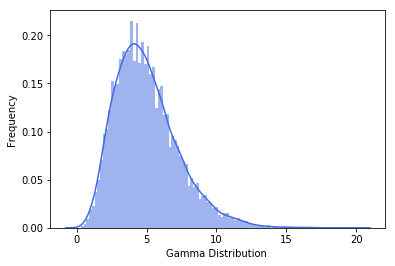

In [25]:
data_gamma = stats.gamma.rvs(a=5, size=n)
ax = sns.distplot(data_gamma,
                  bins=100,
                  kde=True,
                  color='royalblue',
                  hist_kws={"linewidth": 10,'alpha': 0.50})
ax.set(xlabel='Gamma Distribution ', ylabel='Frequency')

### Exponential distribution

How long until an event (e.g., customer calling, memory corruption, earthquake)?

The Exponential distribution is characterised by the rate parameter, $\lambda$.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution ')]

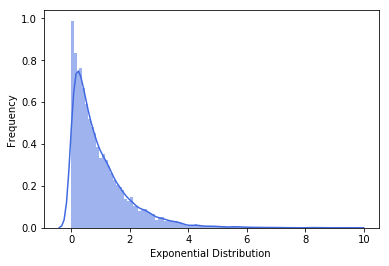

In [26]:
data_exponential = stats.expon.rvs(scale=1, loc=0, size=n)
ax = sns.distplot(data_exponential,
                  bins=100,
                  kde=True,
                  color='royalblue',
                  hist_kws={"linewidth": 10,'alpha': 0.50})
ax.set(xlabel='Exponential Distribution ', ylabel='Frequency')

### Poisson distribution

How many events per time interval (e.g., number of customers that called the call centre)?

Characterised by the event rate parameter, $\lambda$ (the average number of events in an interval).

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution ')]

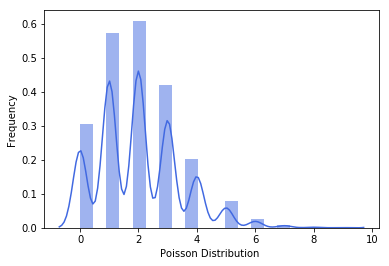

In [27]:
data_poisson = stats.poisson.rvs(mu=2, size=10000)
ax = sns.distplot(data_poisson,
                  bins=20,
                  kde=True,
                  color='royalblue',
                  hist_kws={"linewidth": 10,'alpha': 0.50})
ax.set(xlabel='Poisson Distribution ', ylabel='Frequency')

*The End*